In [2]:
import pandas as pd
raw_data = pd.read_csv('TP_1_prostate_dataset.txt', delimiter='\t')

In [4]:
raw_data.head()

col    lcavol   lweight  age      lbph  svi       lcp  gleason  pgg45  \
0    1 -0.579818  2.769459   50 -1.386294    0 -1.386294        6      0   
1    2 -0.994252  3.319626   58 -1.386294    0 -1.386294        6      0   
2    3 -0.510826  2.691243   74 -1.386294    0 -1.386294        7     20   
3    4 -1.203973  3.282789   58 -1.386294    0 -1.386294        6      0   
4    5  0.751416  3.432373   62 -1.386294    0 -1.386294        6      0   

       lpsa train  
0 -0.430783     T  
1 -0.162519     T  
2 -0.162519     T  
3 -0.162519     T  
4  0.371564     T

In [3]:
X_train = raw_data.iloc[:60,1:-3]
y_train = raw_data.iloc[:60,-2]
X_test = raw_data.iloc[60:,1:-3]
y_test = raw_data.iloc[60:,-2]

## La baseline : une régression classique

In [6]:
from sklearn import linear_model
import numpy as np

# On crée un modèle de régression linéaire
lr = linear_model.LinearRegression()

# On entraîne ce modèle sur les données d'entrainement
lr.fit(X_train,y_train)

# On récupère l'erreur de norme 2 sur le jeu de données test comme baseline
baseline_error = np.mean((lr.predict(X_test) - y_test) ** 2)

print(baseline_error)

2.8641499657014413


## Application de la régression ridge

### Application de la régression ridge

In [8]:
n_alphas = 200
alphas = np.logspace(-5, 5, n_alphas)

In [10]:
from sklearn.linear_model import Ridge
ridge = linear_model.Ridge()

coefs = []
errors = []
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)
    errors.append([baseline_error, np.mean((ridge.predict(X_test) - y_test) ** 2)])


/home/jose/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


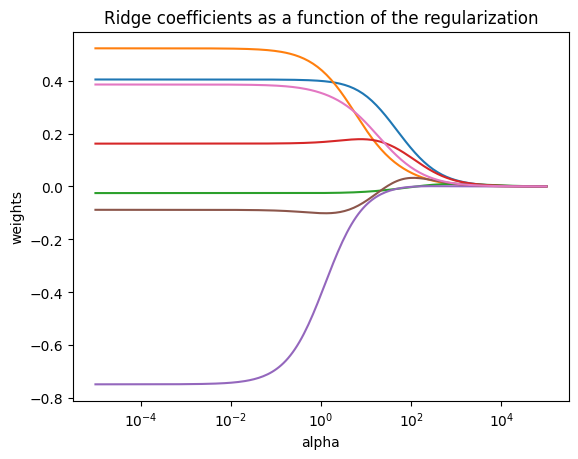

In [11]:
import matplotlib.pyplot as plt

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [12]:
ax = plt.gca()

ax.plot(alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.axis('tight')
plt.show()

In [13]:
min(errors)

[2.8641499657014413, 2.064827060795023]

### Application du Lasso

In [14]:
n_alphas = 300
alphas = np.logspace(-5, 1, n_alphas)
lasso = linear_model.Lasso(fit_intercept=False)

coefs = []
errors = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    errors.append([baseline_error, np.mean((lasso.predict(X_test) - y_test) ** 2)])

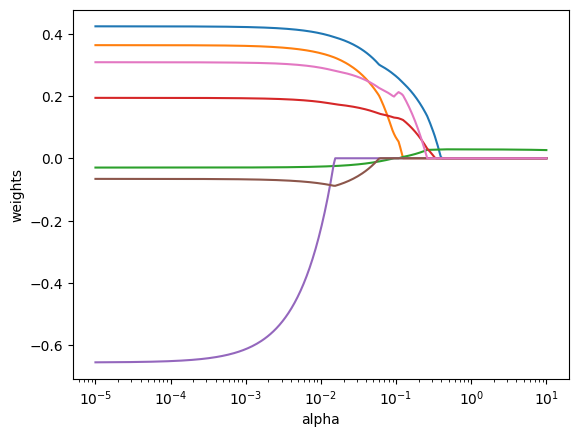

In [15]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.axis('tight')
plt.show()